# Load Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [ ]:
totalClass = 8
shufflePixels = False # will generate noise here 
shuffleLabels = False

In [ ]:
# Load data
_, y_train, _, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

x_train = np.random.uniform(low=0, high=225, size=((5000*totalClass), 32, 32, 3))
x_test = np.random.uniform(low=0, high=225, size=((1000*totalClass), 32, 32, 3))
x_train = np.int8(x_train)
x_test = np.int8(x_test)

"""
Generate randome labels (equal likely)
"""

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(40000, 32, 32, 3)
(40000, 8)
(8000, 32, 32, 3)
(8000, 8)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Populating the interactive namespace from numpy and matplotlib


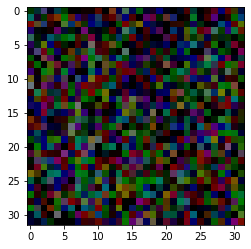

In [ ]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

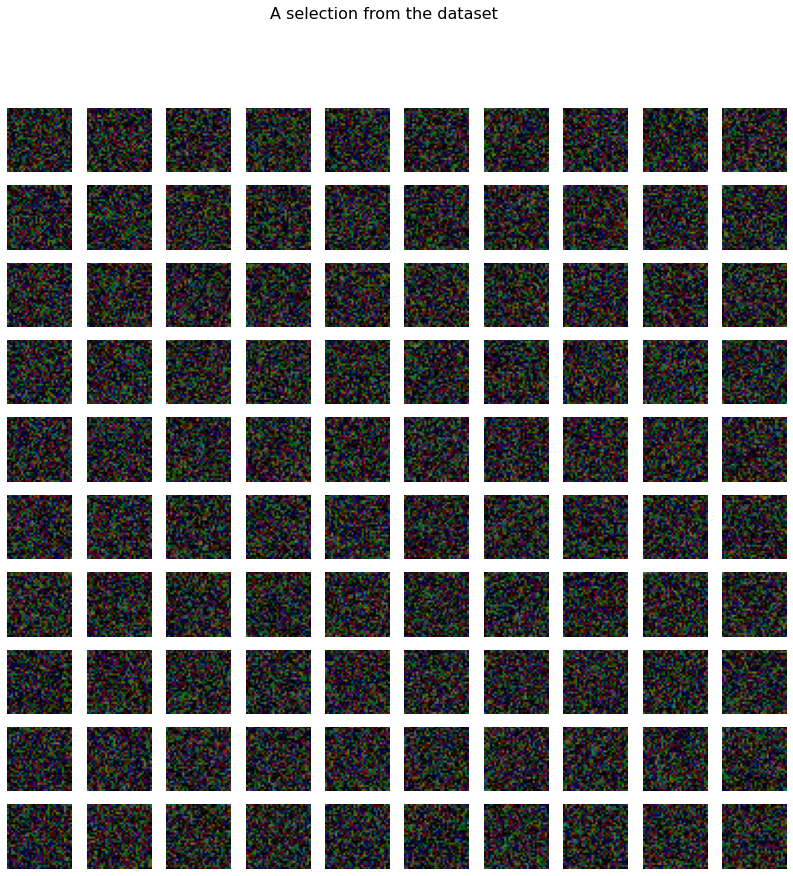

In [ ]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx], cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [ ]:
vgg16 = models.vgg16(totalClass)
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 12s 33ms/step - loss: 2.0915 - accuracy: 0.1250
test loss, test acc: [2.091493844985962, 0.125]
Evaluate on test data
16/16 [==============================] - 1s 85ms/step - loss: 2.0917 - accuracy: 0.1250
test loss, test acc: [2.091660976409912, 0.125]


In [ ]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
400/400 [==============================] - 15s 33ms/step - loss: 2.0807 - accuracy: 0.1223 - val_loss: 2.0801 - val_accuracy: 0.1250
Epoch 2/250
400/400 [==============================] - 12s 31ms/step - loss: 2.0798 - accuracy: 0.1252 - val_loss: 2.0796 - val_accuracy: 0.1259
Epoch 3/250
400/400 [==============================] - 13s 32ms/step - loss: 2.0795 - accuracy: 0.1260 - val_loss: 2.0796 - val_accuracy: 0.1243
Epoch 4/250
400/400 [==============================] - 12s 31ms/step - loss: 2.0793 - accuracy: 0.1274 - val_loss: 2.0796 - val_accuracy: 0.1250
Epoch 5/250
400/400 [==============================] - 13s 32ms/step - loss: 2.0790 - accuracy: 0.1306 - val_loss: 2.0796 - val_accuracy: 0.1262
Epoch 6/250
400/400 [==============================] - 12s 31ms/step - loss: 2.0788 - accuracy: 0.1331 - val_loss: 2.0797 - val_accuracy: 0.1262
Epoch 7/250
400/400 [==============================] - 12s 31ms/step - loss: 2.0785 - accuracy: 0.1348 - val_loss: 2.0802 - val_ac

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 2s 30ms/step - loss: 0.0100 - accuracy: 0.9967
test loss, test acc: [0.00999998115003109, 0.9967250227928162]
Evaluate on test data
16/16 [==============================] - 1s 30ms/step - loss: 9.3230 - accuracy: 0.1215
test loss, test acc: [9.323028564453125, 0.12150000035762787]


# Small

In [ ]:
small = models.small(totalClass)
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 1s 7ms/step - loss: 18.6246 - accuracy: 0.1251
test loss, test acc: [18.624568939208984, 0.1251000016927719]
Evaluate on test data
16/16 [==============================] - 0s 12ms/step - loss: 18.6647 - accuracy: 0.1229
test loss, test acc: [18.664735794067383, 0.12287499755620956]


In [ ]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
400/400 [==============================] - 4s 8ms/step - loss: 3.6465 - accuracy: 0.1245 - val_loss: 2.0802 - val_accuracy: 0.1252
Epoch 2/250
400/400 [==============================] - 3s 8ms/step - loss: 2.0860 - accuracy: 0.1223 - val_loss: 2.0794 - val_accuracy: 0.1248
Epoch 3/250
400/400 [==============================] - 3s 8ms/step - loss: 2.0837 - accuracy: 0.1246 - val_loss: 2.0795 - val_accuracy: 0.1250
Epoch 4/250
400/400 [==============================] - 3s 8ms/step - loss: 2.0829 - accuracy: 0.1241 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 5/250
400/400 [==============================] - 3s 8ms/step - loss: 2.0823 - accuracy: 0.1233 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 6/250
400/400 [==============================] - 3s 8ms/step - loss: 2.0813 - accuracy: 0.1214 - val_loss: 2.0794 - val_accuracy: 0.1251
Epoch 7/250
400/400 [==============================] - 3s 8ms/step - loss: 2.0811 - accuracy: 0.1228 - val_loss: 2.0794 - val_accuracy: 0.1250

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 1s 7ms/step - loss: 1.8985 - accuracy: 0.3547
test loss, test acc: [1.8984594345092773, 0.3547250032424927]
Evaluate on test data
16/16 [==============================] - 0s 7ms/step - loss: 2.1050 - accuracy: 0.1235
test loss, test acc: [2.1049599647521973, 0.12349999696016312]


#tNet

In [ ]:
tNet = models.tNet(totalClass)
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 5s 41ms/step - loss: 2.2376 - accuracy: 0.1245
test loss, test acc: [2.237569808959961, 0.124549999833107]
Evaluate on test data
16/16 [==============================] - 1s 68ms/step - loss: 2.2373 - accuracy: 0.1264
test loss, test acc: [2.237316846847534, 0.1263750046491623]


In [ ]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
400/400 [==============================] - 19s 42ms/step - loss: 2.3223 - accuracy: 0.1268 - val_loss: 2.1886 - val_accuracy: 0.1268
Epoch 2/250
400/400 [==============================] - 16s 41ms/step - loss: 2.0522 - accuracy: 0.1867 - val_loss: 2.1512 - val_accuracy: 0.1208
Epoch 3/250
400/400 [==============================] - 16s 40ms/step - loss: 1.8658 - accuracy: 0.2943 - val_loss: 2.1891 - val_accuracy: 0.1164
Epoch 4/250
400/400 [==============================] - 16s 41ms/step - loss: 1.6757 - accuracy: 0.3956 - val_loss: 2.2702 - val_accuracy: 0.1309
Epoch 5/250
400/400 [==============================] - 16s 40ms/step - loss: 1.4661 - accuracy: 0.4857 - val_loss: 2.4311 - val_accuracy: 0.1276
Epoch 6/250
400/400 [==============================] - 16s 41ms/step - loss: 1.2539 - accuracy: 0.5658 - val_loss: 2.6292 - val_accuracy: 0.1289
Epoch 7/250
400/400 [==============================] - 16s 41ms/step - loss: 1.0368 - accuracy: 0.6475 - val_loss: 2.8317 - val_ac

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 3s 41ms/step - loss: 0.0077 - accuracy: 0.9993
test loss, test acc: [0.007741025649011135, 0.9992750287055969]
Evaluate on test data
16/16 [==============================] - 1s 40ms/step - loss: 7.0273 - accuracy: 0.1320
test loss, test acc: [7.027259826660156, 0.13199999928474426]


# ConvNet

In [ ]:
convNet = models.convNet(totalClass)
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [ ]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 7s 51ms/step - loss: 2.8174 - accuracy: 0.1256
test loss, test acc: [2.8174145221710205, 0.12555000185966492]
Evaluate on test data
16/16 [==============================] - 2s 134ms/step - loss: 2.8128 - accuracy: 0.1254
test loss, test acc: [2.8127808570861816, 0.12537500262260437]


In [23]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
400/400 [==============================] - 18s 41ms/step - loss: 2.0911 - accuracy: 0.1235 - val_loss: 2.0796 - val_accuracy: 0.1255
Epoch 2/250
400/400 [==============================] - 16s 40ms/step - loss: 2.0795 - accuracy: 0.1207 - val_loss: 2.0797 - val_accuracy: 0.1260
Epoch 3/250
400/400 [==============================] - 16s 40ms/step - loss: 2.0796 - accuracy: 0.1219 - val_loss: 2.0794 - val_accuracy: 0.1252
Epoch 4/250
400/400 [==============================] - 16s 41ms/step - loss: 2.0795 - accuracy: 0.1213 - val_loss: 2.0794 - val_accuracy: 0.1250
Epoch 5/250
400/400 [==============================] - 16s 40ms/step - loss: 2.0795 - accuracy: 0.1217 - val_loss: 2.0794 - val_accuracy: 0.1249
Epoch 6/250
400/400 [==============================] - 16s 41ms/step - loss: 2.0794 - accuracy: 0.1214 - val_loss: 2.0794 - val_accuracy: 0.1251
Epoch 7/250
400/400 [==============================] - 16s 41ms/step - loss: 2.0795 - accuracy: 0.1230 - val_loss: 2.0794 - val_ac

In [24]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
79/79 [==============================] - 4s 48ms/step - loss: 2.0794 - accuracy: 0.1250
test loss, test acc: [2.0794425010681152, 0.125]
Evaluate on test data
16/16 [==============================] - 1s 48ms/step - loss: 2.0794 - accuracy: 0.1250
test loss, test acc: [2.079441785812378, 0.125]


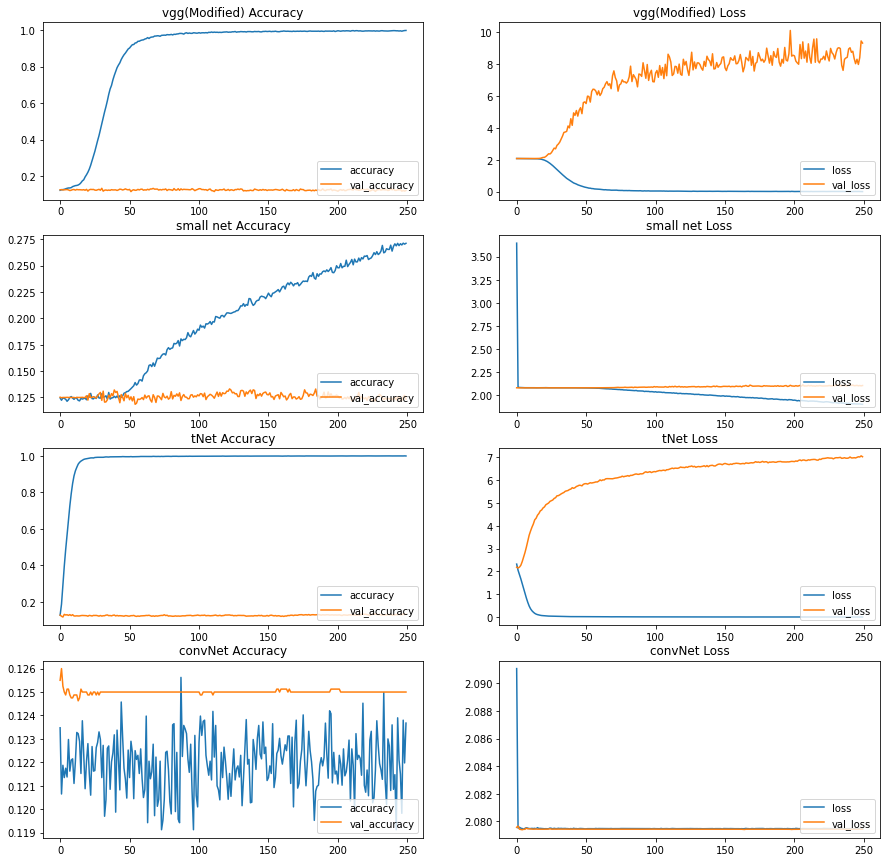

In [25]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1
